# Bangla Nespaper Headline Classification Using LSTM, BiLSTM, BiGRU

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Read Data

In [ ]:
import pandas as pd

# read the Excel file
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/10K dataset.xlsx')

# convert to CSV
df.to_csv('file.csv', index=False)

In [ ]:
df.shape

(10000, 3)

In [ ]:
df.head()

,headline,category,newspaper name
0,‘১ মিনিটে নগদ অ্যাকাউন্ট’ সেবা উদ্বোধনে জয়,IT,Jugantor
1,‘১৫ হাজার কোটি টাকা ব্যয়ে সৈয়দপুর বিমানবন্দরের...,national,Dainik Ittefaq
2,‘২ ঘণ্টায় সালমানের গ্যালাক্সি অ্যাপার্টমেন্ট ব...,Amusement,Jugantor
3,‘২ বছর নিষিদ্ধ হতে পারতেন রোনাল্ডো’,sports,Jugantor
4,‘৩০৮ জন নারীর সঙ্গে শারীরিক সম্পর্ক সঞ্জয় দত্তের’,Amusement,Jugantor


In [ ]:
df.isnull().sum()

headline          0
category          0
newspaper name    0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 87


In [ ]:
#dropping the duplicated rows
df=df.drop_duplicates(keep="first")
print("After removing,now number of duplicated rows are:",df.duplicated().sum())

After removing,now number of duplicated rows are: 0


In [ ]:
df.category.value_counts()

politics         1692
national         1689
Amusement        1673
sports           1630
International    1628
IT               1601
Name: category, dtype: int64

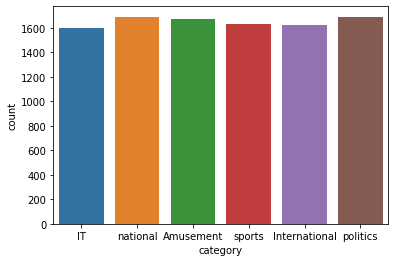

In [ ]:
sns.countplot(x="category",data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9913 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   headline        9913 non-null   object
 1   category        9913 non-null   object
 2   newspaper name  9913 non-null   object
dtypes: object(3)
memory usage: 567.8+ KB


In [ ]:
import re
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
df['textC'] = df.headline.apply(lambda x: preprocessing(str(x)))

In [ ]:
df.head()

,headline,category,newspaper name,textC
0,‘১ মিনিটে নগদ অ্যাকাউন্ট’ সেবা উদ্বোধনে জয়,IT,Jugantor,মিনিটে নগদ অ্যাকাউন্ট সেবা উদ্বোধনে জয়
1,‘১৫ হাজার কোটি টাকা ব্যয়ে সৈয়দপুর বিমানবন্দরের...,national,Dainik Ittefaq,হাজার কোটি টাকা ব্যয়ে সৈয়দপুর বিমানবন্দরের কা...
2,‘২ ঘণ্টায় সালমানের গ্যালাক্সি অ্যাপার্টমেন্ট ব...,Amusement,Jugantor,ঘণ্টায় সালমানের গ্যালাক্সি অ্যাপার্টমেন্ট বোম...
3,‘২ বছর নিষিদ্ধ হতে পারতেন রোনাল্ডো’,sports,Jugantor,বছর নিষিদ্ধ হতে পারতেন রোনাল্ডো
4,‘৩০৮ জন নারীর সঙ্গে শারীরিক সম্পর্ক সঞ্জয় দত্তের’,Amusement,Jugantor,জন নারীর সঙ্গে শারীরিক সম্পর্ক সঞ্জয় দত্তের


In [ ]:
data1 =pd.read_excel('/content/drive/MyDrive/Colab Notebooks/stopwords_bangla.xlsx')
stop = data1['words'].tolist()

In [ ]:
display(stop)

['অই',
 'অগত্যা',
 'অত: পর',
 'অতএব',
 'অথচ',
 'অথবা',
 'অধিক',
 'অধীনে',
 'অধ্যায়',
 'অনুগ্রহ',
 'অনুভূত',
 'অনুযায়ী',
 'অনুরূপ',
 'অনুসন্ধান',
 'অনুসরণ',
 'অনুসারে',
 'অনুসৃত',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অন্যত্র',
 'অন্যভাবে',
 'অন্যান্য',
 'অপেক্ষাকৃতভাবে',
 'অবধি',
 'অবশ্য',
 'অবশ্যই',
 'অবস্থা',
 'অবিলম্বে',
 'অভ্যন্তরস্থ',
 'অর্জিত',
 'অর্থাত',
 'অসদৃশ',
 'অসম্ভাব্য',
 'আইন',
 'আউট',
 'আক্রান্ত',
 'আগামী',
 'আগে',
 'আগেই',
 'আগ্রহী',
 'আছে',
 'আজ',
 'আট',
 'আদেশ',
 'আদ্যভাগে',
 'আন্দাজ',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদিগের',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'আশি',
 'আশু',
 'আসা',
 'আসে',
 'ই',
 'ইচ্ছা',
 'ইচ্ছাপূর্বক',
 'ইতিমধ্যে',
 'ইতোমধ্যে',
 'ইত্যাদি',
 'ইশারা',
 'ইহা',
 'ইহাতে',
 'উক্তি',
 'উচিত',
 'উচ্চ',
 'উঠা',
 'উত্তম',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'উপলব্ধ',
 'উপায়',
 'উভয়',
 'উল্লেখ',
 'উল্লেখযোগ্যভাবে',
 'উহার',
 'ঊর্ধ্বতন',
 'এ',
 'এপর্যন্ত',
 'এঁদের',
 'এঁরা',
 'এই',
 'এইগুলো',
 'এইভাবে',
 'এক',
 'একই

In [ ]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)

In [ ]:
df['textC'] = df.textC.apply(lambda x: stopwordRemoval(str(x)))

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Function for generating word clouds
def generate_wordcloud(data,title):
  data = [tuple(x) for x in data.values]
  wc = WordCloud(font_path="/content/drive/MyDrive/Colab Notebooks/Siyamrupali.ttf",width=1080, height=720, max_words=150,colormap="Dark2").generate_from_frequencies(dict(data))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap("Word Cloud of "+title,60)),fontsize=13)
  plt.show()

<ipython-input-31-cf25989526bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['textC'].apply(lambda x:str(x).split())


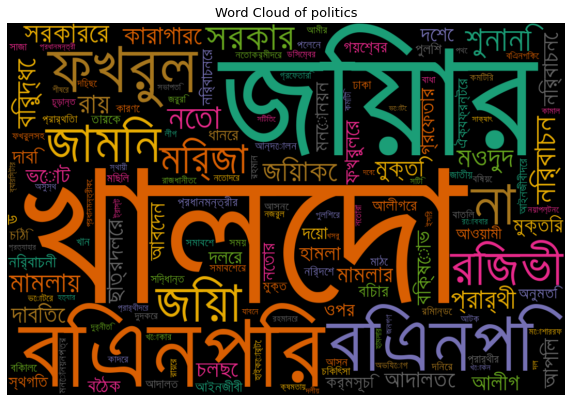

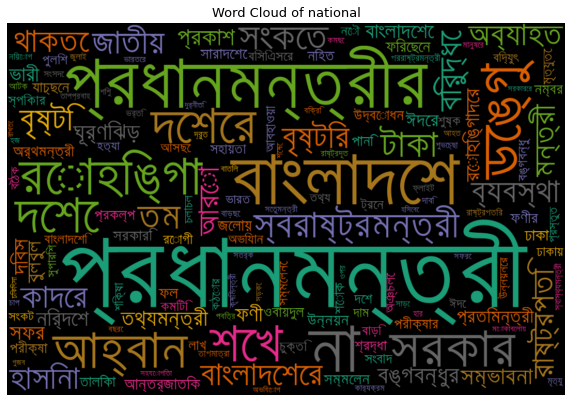

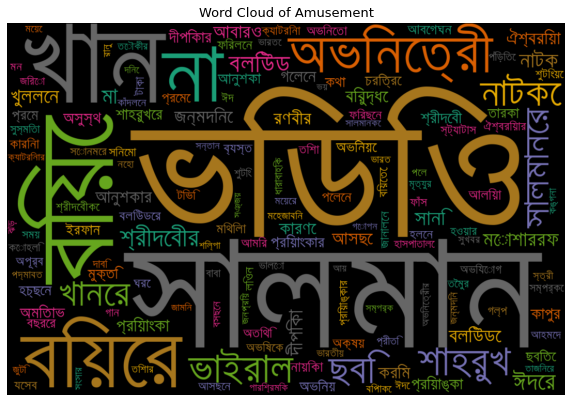

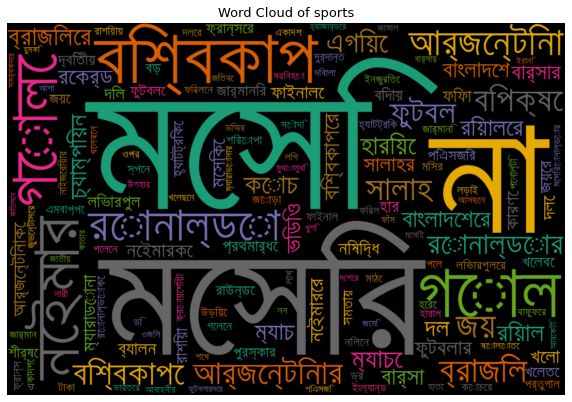

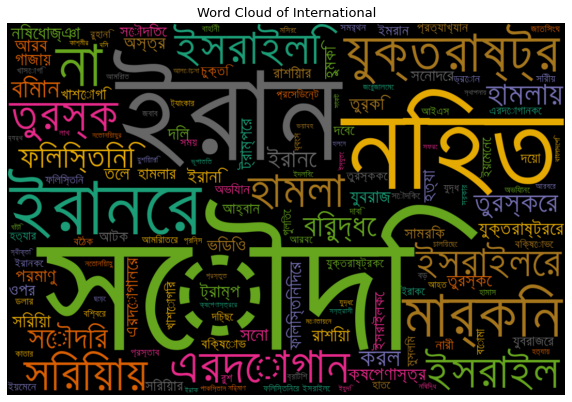

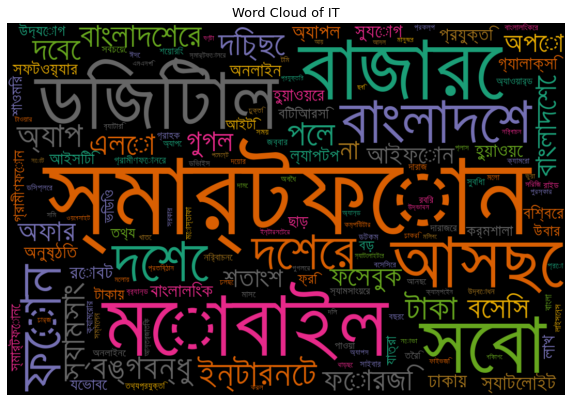

In [ ]:
from collections import Counter
category_list = ["politics","national","Amusement","sports","International","IT"]
for i in category_list:
    temp=df.loc[df['category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['textC'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(500000))
    temp.columns = ['Common_words','count']
    generate_wordcloud(temp,str(i))


In [ ]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df['textC']=df['textC'].apply(stem_text)

In [ ]:
df.head()

,headline,category,newspaper name,textC
0,‘১ মিনিটে নগদ অ্যাকাউন্ট’ সেবা উদ্বোধনে জয়,IT,Jugantor,মিনিটে নগদ অ্যাকাউন্ট সেবা উদ্বোধনে জয়
1,‘১৫ হাজার কোটি টাকা ব্যয়ে সৈয়দপুর বিমানবন্দরের...,national,Dainik Ittefaq,টাকা ব্যয় সৈয়দপুর বিমানবন্দর শিগগির
2,‘২ ঘণ্টায় সালমানের গ্যালাক্সি অ্যাপার্টমেন্ট ব...,Amusement,Jugantor,ঘণ্টায় সালমান গ্যালাক্সি অ্যাপার্টমেন্ট বোমা ম...
3,‘২ বছর নিষিদ্ধ হতে পারতেন রোনাল্ডো’,sports,Jugantor,নিষিদ্ধ পারতেন রোনাল্ডো
4,‘৩০৮ জন নারীর সঙ্গে শারীরিক সম্পর্ক সঞ্জয় দত্তের’,Amusement,Jugantor,নারীর শারীরিক সম্পর্ক সঞ্জয় দত্ত


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y=le.fit_transform(df["category"])

In [ ]:
len(y)

9913

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot


In [ ]:
# one hot representation of words
oh_repr = [one_hot(words, 5000) for words in df.textC]

In [ ]:
# list to store length of words in each news
len_list = []
for w in df.textC:
    w = w.split()
    len_list.append(len(w))

print('Summary of word length :')
pd.Series(len_list).describe()

Summary of word length :


count    9913.000000
mean        5.009180
std         1.556709
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        11.000000
dtype: float64

In [ ]:
# taking sentences length as 400
sent_length = 40
# padding
embedded_doc = pad_sequences(oh_repr, padding='post', maxlen=sent_length)
embedded_doc[:5]

array([[4143, 2155,  983, 1979, 3021, 1029,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [1612, 2246, 1068, 3302, 1854,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [3266, 4130, 4034, 4264, 1438, 3184, 1883, 1856,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [4490, 2901, 4971,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  

In [ ]:
embedded_doc.shape

(9913, 40)

In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(embedded_doc)
y = y

# splitting the dataset into train and test
train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    test_size=0.1, random_state=3)

Text(0, 0.5, 'Score')

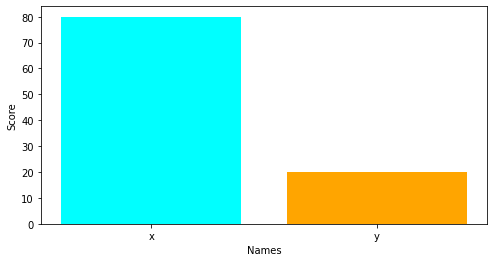

In [ ]:
x_s = {}
y_s = {}

x_s["x"] = 80
x_s["y"] = 20

#nam = x_s.keys()
#val = y_s.values()

names = list(x_s.keys())
values = list(x_s.values())
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}

plt.figure(figsize=(8,4))
plt.bar(names,values,color=colors)
plt.xlabel("Names")
plt.ylabel("Score")


# Bi-LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

model_acc={}
model_val_acc={}

In [ ]:
vocab_size = 3000
model =tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=200, input_length=sent_length),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(6, activation='softmax')])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, epochs=20, validation_data=(test_x,test_y), batch_size=64)

Epoch 1/20
140/140 [==============================] - 34s 89ms/step - loss: 1.4774 - accuracy: 0.3708 - val_loss: 1.1199 - val_accuracy: 0.5605
Epoch 2/20
140/140 [==============================] - 3s 21ms/step - loss: 0.9855 - accuracy: 0.6309 - val_loss: 0.9885 - val_accuracy: 0.6442
Epoch 3/20
140/140 [==============================] - 3s 21ms/step - loss: 0.7149 - accuracy: 0.7509 - val_loss: 0.9938 - val_accuracy: 0.6411
Epoch 4/20
140/140 [==============================] - 3s 21ms/step - loss: 0.5750 - accuracy: 0.8048 - val_loss: 1.0008 - val_accuracy: 0.6653
Epoch 5/20
140/140 [==============================] - 3s 21ms/step - loss: 0.4736 - accuracy: 0.8368 - val_loss: 1.0642 - val_accuracy: 0.6704
Epoch 6/20
140/140 [==============================] - 3s 18ms/step - loss: 0.4099 - accuracy: 0.8665 - val_loss: 1.1636 - val_accuracy: 0.6643
Epoch 7/20
140/140 [==============================] - 2s 15ms/step - loss: 0.3631 - accuracy: 0.8782 - val_loss: 1.2008 - val_accuracy: 0.652

In [ ]:
Train_acc1=history.history['accuracy'][-1]
Val_acc1=history.history['val_accuracy'][-1]

model_acc["BiLSTM"]=Train_acc1
model_val_acc["BiLSTM"]=Val_acc1

print("Train accuracy",Train_acc1)
print("Validation accuracy",Val_acc1)

Train accuracy 0.9514628648757935
Validation accuracy 0.649193525314331


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.title(string+' Measurement')
    plt.show()

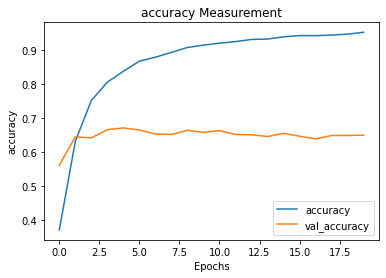

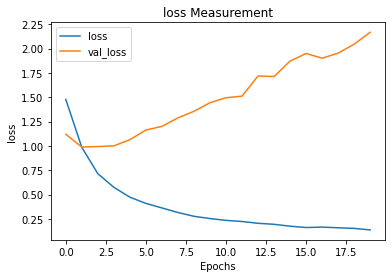

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,precision_score,roc_curve,auc,recall_score,precision_score
pred = model.predict(test_x)

31/31 [==============================] - 2s 8ms/step


In [ ]:
predIdxs1 = np.argmax(pred, axis=1)

In [ ]:
# show a nicely formatted classification report
print(classification_report(test_y, predIdxs1))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57       172
           1       0.60      0.63      0.62       159
           2       0.70      0.69      0.70       153
           3       0.55      0.55      0.55       172
           4       0.78      0.75      0.77       178
           5       0.66      0.73      0.69       158

    accuracy                           0.65       992
   macro avg       0.65      0.65      0.65       992
weighted avg       0.65      0.65      0.65       992



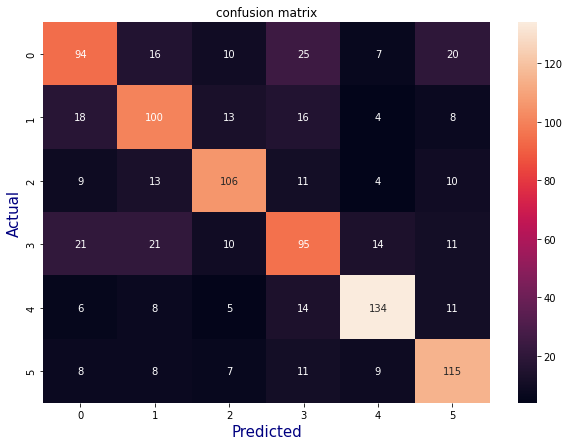

In [ ]:

# plotting graph for confusion matrix
cm = confusion_matrix(test_y, predIdxs1)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='', cbar=True)
plt.title('confusion matrix')
plt.xlabel('Predicted', color='navy', fontsize=15)
plt.ylabel('Actual', color='navy', fontsize=15);

# LSTM

In [ ]:
# initializing model
#model2 = Sequential()
# adding embedding layer
#model2.add(Embedding(vocab_size, 1000, input_length=sent_length))
#model2.add(LSTM(256))
#model2.add(Dense(6, activation='softmax'))
#model2.summary()

#vocab_size = 5000
model2 = Sequential()
model2.add(Embedding(3000, 100, input_length=sent_length))
model2.add(LSTM(64, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(32))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(6, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 100)           300000    
                                                                 
 lstm_2 (LSTM)               (None, 40, 64)            42240     
                                                                 
 dropout_3 (Dropout)         (None, 40, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_x, train_y, epochs=20, validation_data=(test_x,test_y), batch_size=64)

Epoch 1/20
140/140 [==============================] - 14s 71ms/step - loss: 1.7923 - accuracy: 0.1715 - val_loss: 1.7917 - val_accuracy: 0.1794
Epoch 2/20
140/140 [==============================] - 3s 19ms/step - loss: 1.7923 - accuracy: 0.1743 - val_loss: 1.7912 - val_accuracy: 0.1734
Epoch 3/20
140/140 [==============================] - 2s 12ms/step - loss: 1.7920 - accuracy: 0.1706 - val_loss: 1.7912 - val_accuracy: 0.1794
Epoch 4/20
140/140 [==============================] - 3s 23ms/step - loss: 1.7692 - accuracy: 0.1922 - val_loss: 1.6063 - val_accuracy: 0.2944
Epoch 5/20
140/140 [==============================] - 2s 14ms/step - loss: 1.5852 - accuracy: 0.2918 - val_loss: 1.4965 - val_accuracy: 0.3851
Epoch 6/20
140/140 [==============================] - 2s 11ms/step - loss: 1.3364 - accuracy: 0.4378 - val_loss: 1.2698 - val_accuracy: 0.4839
Epoch 7/20
140/140 [==============================] - 2s 17ms/step - loss: 1.0994 - accuracy: 0.5730 - val_loss: 1.2866 - val_accuracy: 0.521

In [ ]:
Train_acc2=history2.history['accuracy'][-1]
Val_acc2=history2.history['val_accuracy'][-1]

model_acc["LSTM"]=Train_acc2
model_val_acc["LSTM"]=Val_acc2

print("Train accuracy",Train_acc2)
print("Validation accuracy",Val_acc2)

Train accuracy 0.838470995426178
Validation accuracy 0.6088709831237793


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.title(string+' Measurement')
    plt.show()

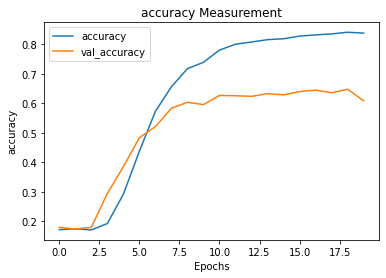

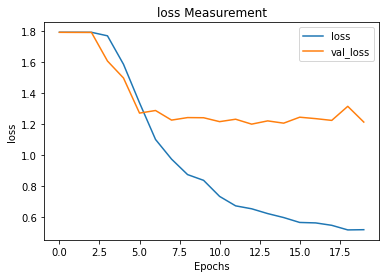

In [ ]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

In [ ]:
pred2 = model2.predict(test_x)

31/31 [==============================] - 1s 3ms/step


In [ ]:
predIdxs2 = np.argmax(pred2, axis=1)

In [ ]:
# show a nicely formatted classification report
print(classification_report(test_y, predIdxs2))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       172
           1       0.66      0.54      0.59       159
           2       0.59      0.65      0.62       153
           3       0.52      0.47      0.49       172
           4       0.82      0.71      0.77       178
           5       0.54      0.71      0.61       158

    accuracy                           0.61       992
   macro avg       0.62      0.61      0.61       992
weighted avg       0.62      0.61      0.61       992



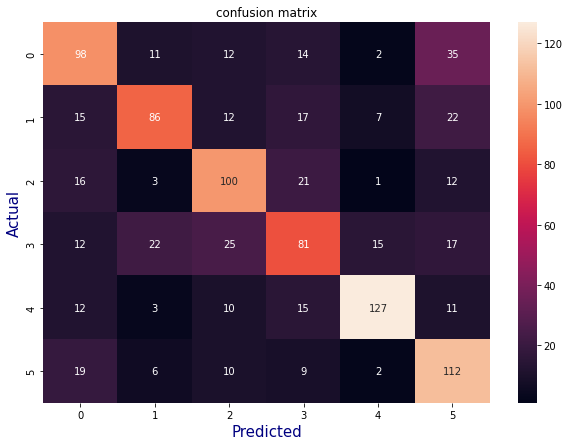

In [ ]:
# plotting graph for confusion matrix
cm = confusion_matrix(test_y, predIdxs2)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='', cbar=True,)
plt.title('confusion matrix')
plt.xlabel('Predicted', color='navy', fontsize=15)
plt.ylabel('Actual', color='navy', fontsize=15);

# Bi GRU

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Bidirectional

In [ ]:
model3 =tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=3000,output_dim=300, input_length=sent_length),
                            tf.keras.layers.Bidirectional(tf.keras.layers.GRU(300, return_sequences=True)),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Bidirectional(tf.keras.layers.GRU(100)),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(6, activation='softmax')])

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history3 = model3.fit(train_x, train_y, batch_size=32, epochs=10, validation_data=(test_x,test_y))

Epoch 1/10
279/279 [==============================] - 20s 45ms/step - loss: 1.2482 - accuracy: 0.5084 - val_loss: 0.9805 - val_accuracy: 0.6452
Epoch 2/10
279/279 [==============================] - 5s 18ms/step - loss: 0.7614 - accuracy: 0.7366 - val_loss: 0.9386 - val_accuracy: 0.6704
Epoch 3/10
279/279 [==============================] - 5s 17ms/step - loss: 0.5644 - accuracy: 0.8078 - val_loss: 1.0057 - val_accuracy: 0.6663
Epoch 4/10
279/279 [==============================] - 5s 20ms/step - loss: 0.4380 - accuracy: 0.8544 - val_loss: 1.0530 - val_accuracy: 0.6724
Epoch 5/10
279/279 [==============================] - 5s 16ms/step - loss: 0.3589 - accuracy: 0.8786 - val_loss: 1.1699 - val_accuracy: 0.6653
Epoch 6/10
279/279 [==============================] - 5s 18ms/step - loss: 0.2993 - accuracy: 0.8998 - val_loss: 1.3026 - val_accuracy: 0.6663
Epoch 7/10
279/279 [==============================] - 4s 15ms/step - loss: 0.2666 - accuracy: 0.9057 - val_loss: 1.3572 - val_accuracy: 0.650

In [ ]:
Train_acc3=history3.history['accuracy'][-1]
Val_acc3=history3.history['val_accuracy'][-1]

model_acc["BiGRU"]=Train_acc3
model_val_acc["BiGRU"]=Val_acc3

print("Train accuracy",Train_acc3)
print("Validation accuracy",Val_acc3)

Train accuracy 0.9299405813217163
Validation accuracy 0.649193525314331


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.title(string+' Measurement')
    plt.show()

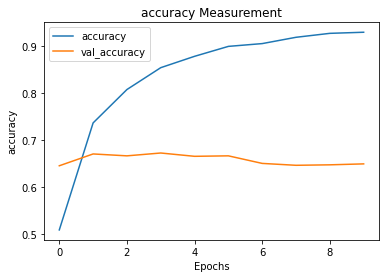

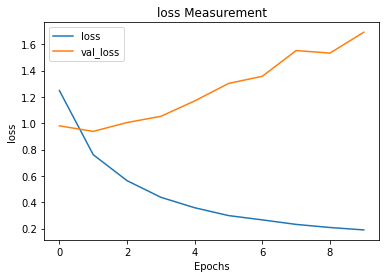

In [ ]:
plot_graphs(history3, "accuracy")
plot_graphs(history3, "loss")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,precision_score,roc_curve,auc,recall_score,precision_score
pred3 = model3.predict(test_x)

31/31 [==============================] - 2s 5ms/step


In [ ]:
predIdxs3 = np.argmax(pred3, axis=1)

In [ ]:
# show a nicely formatted classification report
print(classification_report(test_y, predIdxs3))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       172
           1       0.58      0.65      0.61       159
           2       0.78      0.71      0.75       153
           3       0.53      0.56      0.55       172
           4       0.75      0.74      0.75       178
           5       0.66      0.65      0.66       158

    accuracy                           0.65       992
   macro avg       0.65      0.65      0.65       992
weighted avg       0.65      0.65      0.65       992



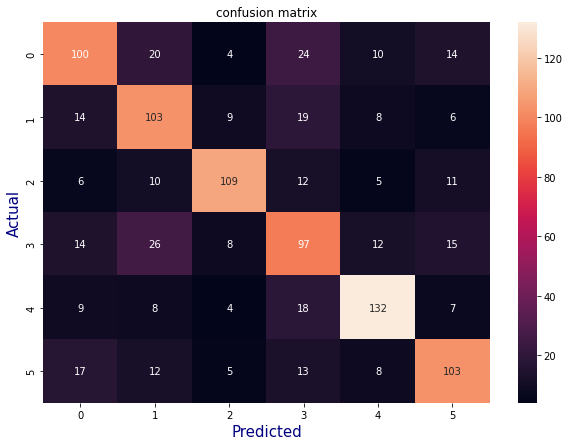

In [ ]:
# plotting graph for confusion matrix
cm = confusion_matrix(test_y, predIdxs3)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='', cbar=True)
plt.title('confusion matrix')
plt.xlabel('Predicted', color='navy', fontsize=15)
plt.ylabel('Actual', color='navy', fontsize=15);

# model Evaluation

In [ ]:
model_scores = pd.DataFrame(model_acc, index=['Score']).transpose()
model_scores = model_scores.sort_values('Score',ascending=False)

In [ ]:
model_scores

,Score
BiLSTM,0.951463
BiGRU,0.929941
LSTM,0.838471


In [ ]:
model_scores = model_scores.reset_index().rename({"index":"Algorithms"}, axis = 1)

model_scores.style.bar()

,Algorithms,Score
0,BiLSTM,0.951463
1,BiGRU,0.929941
2,LSTM,0.838471


Text(0, 0.5, 'Score')

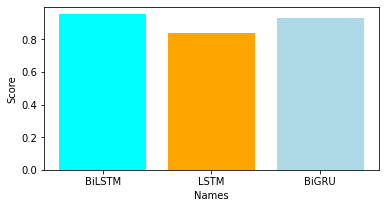

In [ ]:
namess = list(model_acc.keys())
valuess = list(model_acc.values())
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}

plt.figure(figsize=(6,3))
plt.bar(namess,valuess,color=colors)
plt.xlabel("Names")
plt.ylabel("Score")

# Test acc

In [ ]:
model_scoress = pd.DataFrame(model_val_acc, index=['Score']).transpose()
model_scores_val = model_scoress.sort_values('Score',ascending=False)

In [ ]:
model_scores_val

,Score
BiLSTM,0.649194
BiGRU,0.649194
LSTM,0.608871


In [ ]:
model_scores_val = model_scores_val.reset_index().rename({"index":"Algorithms"}, axis = 1)

model_scores_val.style.bar()

,Algorithms,Score
0,BiLSTM,0.649194
1,BiGRU,0.649194
2,LSTM,0.608871


Text(0, 0.5, 'Score')

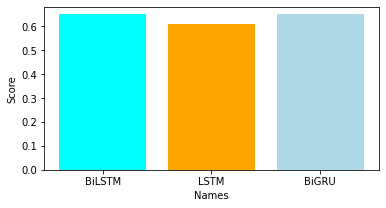

In [ ]:
names = list(model_val_acc.keys())
values = list(model_val_acc.values())
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}

plt.figure(figsize=(6,3))
plt.bar(names,values,color=colors)
plt.xlabel("Names")
plt.ylabel("Score")